## Questions

Major Question: Can we predict the prices of a house in Bengaluru with features like location, number of bedrooms, size ? 

Minor Question: How does the number of bedrooms affect the price?
                Does having a balcony affect the price of a house?
                How does the price vary if the given builiding is socited?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")

df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df['area_type']=df['area_type'].str.replace("  "," ")

<Axes: xlabel='area_type'>

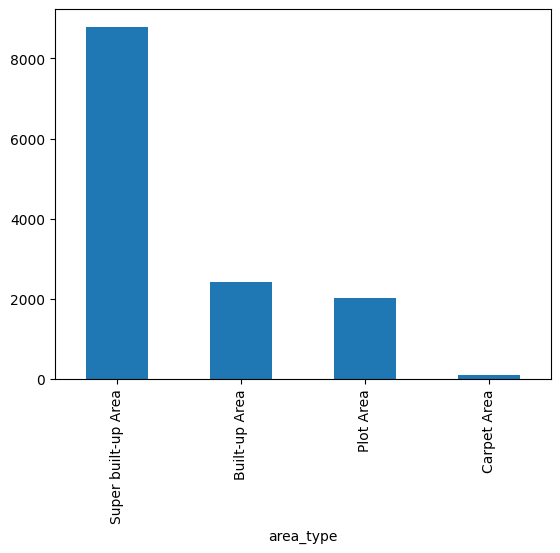

In [6]:
df['area_type'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

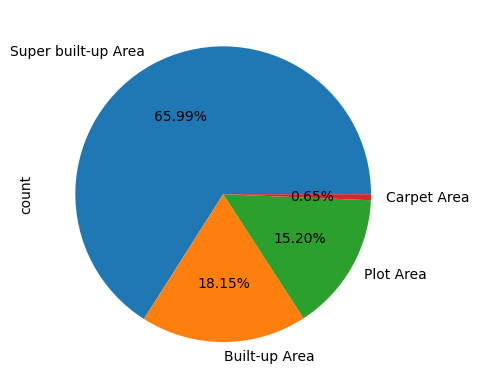

In [7]:
df['area_type'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [8]:
df['availability'].value_counts()

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [9]:
df['availability_index']=df['availability'].apply(lambda x:"Ready To Move" if x=="Ready To Move" or x=="Immediate Posession" else "Under Development")

<Axes: xlabel='availability_index'>

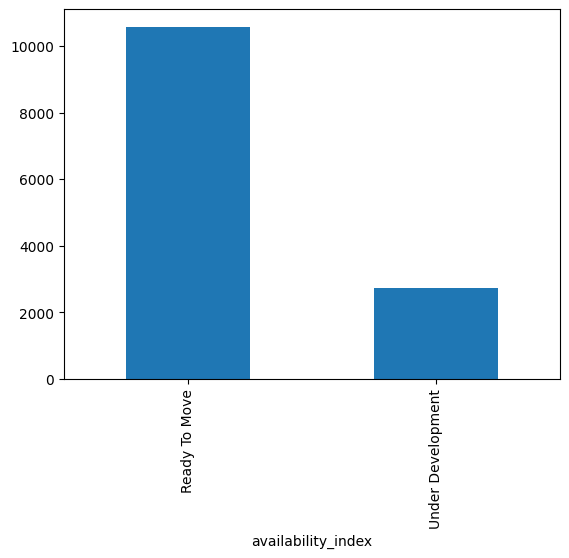

In [10]:
df['availability_index'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

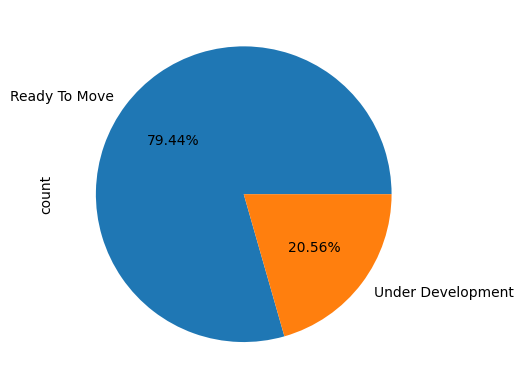

In [11]:
df['availability_index'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [12]:
df['location'].value_counts().count()

np.int64(1305)

In [13]:
df[df['location'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,availability_index
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0,Ready To Move


In [14]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [15]:
df['society'].isnull().sum()

np.int64(5502)

In [16]:
df['society'].fillna("No Society")
df['society_type']=df['society'].apply(lambda x:"No Society" if x=="No Society" else "Society")

In [17]:
df['society'].value_counts()

society
GrrvaGr    80
PrarePa    76
Prtates    59
Sryalan    59
GMown E    56
           ..
SNadeAr     1
DSellil     1
Shensit     1
VKvenas     1
Vemes H     1
Name: count, Length: 2688, dtype: int64

<Axes: ylabel='count'>

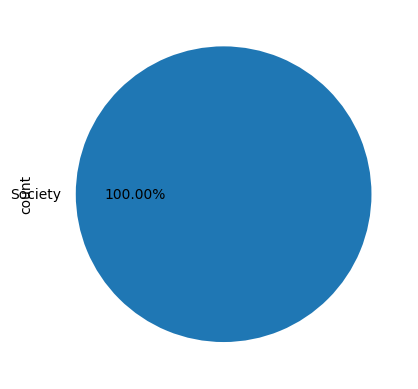

In [18]:
df['society_type'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [19]:
df['total_sqft'].value_counts()

total_sqft
1200           843
1100           221
1500           205
2400           196
600            180
              ... 
2920             1
5665.84          1
1369             1
7150             1
1200 - 1470      1
Name: count, Length: 2117, dtype: int64

In [20]:
df[df['total_sqft'].str.contains('-')]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,availability_index,society_type
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,Under Development,Society
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000,Under Development,Society
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500,Under Development,Society
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,Under Development,Society
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,Under Development,Society
...,...,...,...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122.000,Under Development,Society
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.760,Ready To Move,Society
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,Pardsri,1020 - 1130,NaN,NaN,52.570,Ready To Move,Society
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,Ranuetz,1133 - 1384,2.0,0.0,59.135,Under Development,Society


In [21]:
def total_sqft_averager(x):
    try :
        return float(x)
    except ValueError:
        if isinstance(x,str) and '-' in x:
            try:
                low,high= map(float, x.split('-'))
                return (low+high)/2
            except:
                return None
        else:
            return None
        
        
df['total_sqft_cleaned']=df['total_sqft'].apply(total_sqft_averager)
df[['total_sqft','total_sqft_cleaned']]

,total_sqft,total_sqft_cleaned
0,1056,1056.0
1,2600,2600.0
2,1440,1440.0
3,1521,1521.0
4,1200,1200.0
...,...,...
13315,3453,3453.0
13316,3600,3600.0
13317,1141,1141.0
13318,4689,4689.0


In [22]:
df[df['total_sqft'].str.contains('-')]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,availability_index,society_type,total_sqft_cleaned
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000,Under Development,Society,2475.0
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000,Under Development,Society,3210.0
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500,Under Development,Society,3203.5
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000,Under Development,Society,5611.5
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005,Under Development,Society,1073.5
...,...,...,...,...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122.000,Under Development,Society,2038.5
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.760,Ready To Move,Society,1335.0
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,Pardsri,1020 - 1130,NaN,NaN,52.570,Ready To Move,Society,1075.0
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,Ranuetz,1133 - 1384,2.0,0.0,59.135,Under Development,Society,1258.5


In [23]:
df['total_sqft_cleaned'].value_counts().sort_index()

total_sqft_cleaned
1.0        1
5.0        1
11.0       1
15.0       1
24.0       1
          ..
30400.0    1
35000.0    1
36000.0    1
42000.0    1
52272.0    1
Name: count, Length: 1999, dtype: int64

In [24]:
df[df['total_sqft_cleaned']<200]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,availability_index,society_type,total_sqft_cleaned
349,Plot Area,18-Dec,Suragajakkanahalli,3 Bedroom,PrhyaK,11,3.0,2.0,74.0,Under Development,Society,11.0
1020,Carpet Area,Ready To Move,Weavers Colony,1 BHK,NaN,15,1.0,0.0,30.0,Ready To Move,Society,15.0
1122,Built-up Area,Ready To Move,Grihalakshmi Layout,5 Bedroom,NaN,24,2.0,2.0,150.0,Ready To Move,Society,24.0
4086,Plot Area,Ready To Move,Sarjapur Road,4 Bedroom,NaN,1,4.0,NaN,120.0,Ready To Move,Society,1.0
4972,Built-up Area,Ready To Move,Srirampuram,7 BHK,NaN,5,7.0,3.0,115.0,Ready To Move,Society,5.0
5970,Plot Area,Ready To Move,Mysore Road,1 Bedroom,NaN,45,1.0,0.0,23.0,Ready To Move,Society,45.0
11558,Plot Area,19-Oct,Whitefield,4 Bedroom,NVaree,60,4.0,2.0,218.0,Under Development,Society,60.0


In [25]:
df=df[~(df['total_sqft_cleaned']<200)]

In [26]:
df[df['total_sqft_cleaned']<200]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,availability_index,society_type,total_sqft_cleaned


In [27]:
df['total_sqft_cleaned'].describe()

count    13267.000000
mean      1560.437456
std       1238.228585
min        250.000000
25%       1100.000000
50%       1276.000000
75%       1680.000000
max      52272.000000
Name: total_sqft_cleaned, dtype: float64

In [28]:
df['balcony']=df['balcony'].fillna(0)
df['balcony']=df['balcony'].apply(lambda x:int(x))
df['balcony']

0        1
1        3
2        3
3        1
4        1
        ..
13315    0
13316    0
13317    1
13318    1
13319    1
Name: balcony, Length: 13313, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

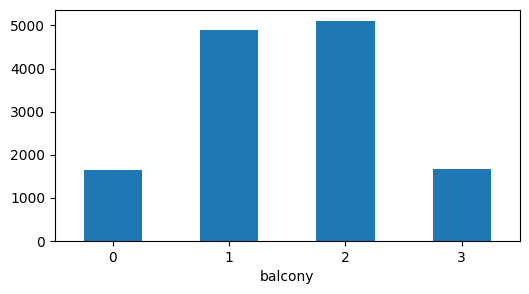

In [29]:
plt.figure(figsize=(6,3))
df['balcony'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)

<Axes: ylabel='Frequency'>

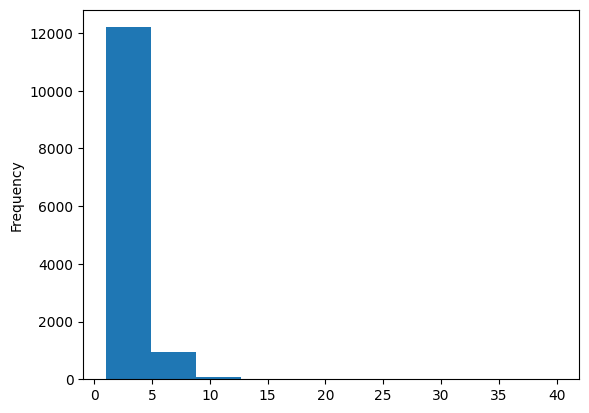

In [30]:
df['bath']=df['bath'].astype('Int64')
df['bath'].plot(kind='hist')

<Axes: >

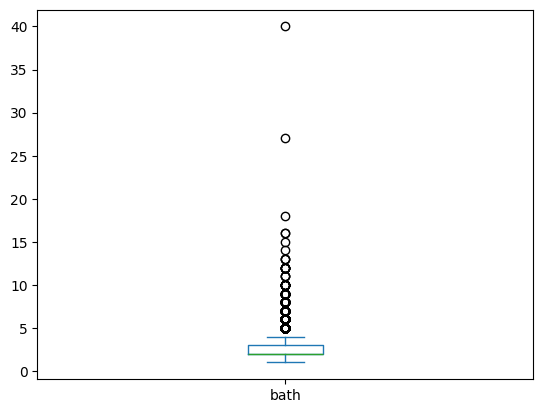

In [31]:
df['bath'].plot(kind='box')

In [32]:
df[df['bath']>=10]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,availability_index,society_type,total_sqft_cleaned
938,Plot Area,Ready To Move,5th Phase JP Nagar,9 Bedroom,NaN,1260,11,0,290.0,Ready To Move,Society,1260.0
1048,Plot Area,Ready To Move,Lakshmi Layout,9 Bedroom,NaN,900,10,0,170.0,Ready To Move,Society,900.0
1078,Plot Area,Ready To Move,BTM 1st Stage,9 Bedroom,Srvasks,3300,14,0,500.0,Ready To Move,Society,3300.0
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,NaN,8000,27,0,230.0,Ready To Move,Society,8000.0
1735,Plot Area,Ready To Move,Kadarenahalli,10 Bedroom,NaN,750,10,0,90.0,Ready To Move,Society,750.0
1768,Plot Area,Ready To Move,1 Ramamurthy Nagar,11 Bedroom,NaN,1200,11,0,170.0,Ready To Move,Society,1200.0
1795,Plot Area,18-Apr,SBM Colony,10 Bedroom,NaN,1660,10,0,475.0,Under Development,Society,1660.0
1953,Plot Area,Ready To Move,KR Puram,8 Bedroom,NaN,1200,12,0,110.0,Ready To Move,Society,1200.0
1979,Plot Area,Ready To Move,Hongasandra,8 Bedroom,NaN,990,12,0,120.0,Ready To Move,Society,990.0
2184,Plot Area,Ready To Move,NS Palya,8 Bedroom,NaN,1500,10,3,165.0,Ready To Move,Society,1500.0


<Axes: ylabel='Frequency'>

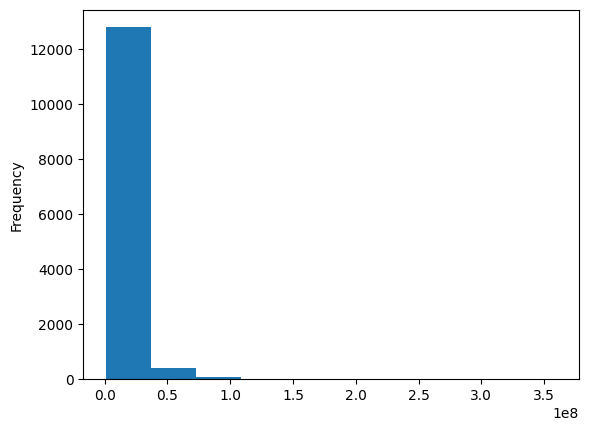

In [33]:
df['price']=df['price'].apply(lambda x:100000*x)
df['price'].plot(kind='hist')

<Axes: >

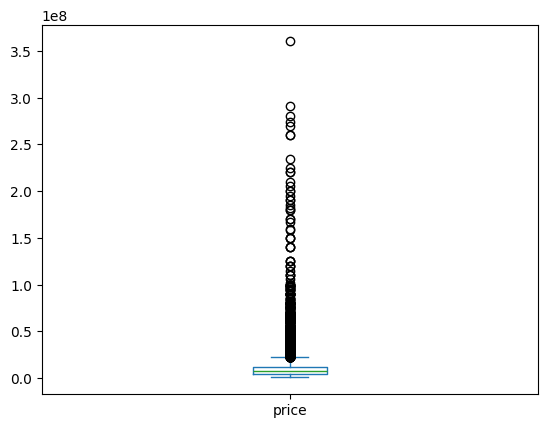

In [34]:
df['price'].plot(kind='box')

In [35]:
df[df['price']>=2000]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,availability_index,society_type,total_sqft_cleaned
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2,1,3907000.0,Under Development,Society,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3,12000000.0,Ready To Move,Society,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2,3,6200000.0,Ready To Move,Society,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1,9500000.0,Ready To Move,Society,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2,1,5100000.0,Ready To Move,Society,1200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4,0,23100000.0,Ready To Move,Society,3453.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5,0,40000000.0,Ready To Move,Society,3600.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2,1,6000000.0,Ready To Move,Society,1141.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4,1,48800000.0,Under Development,Society,4689.0


In [36]:
df['price_per_sqft']=round(df['price']/df['total_sqft_cleaned'],2)

<Axes: ylabel='Frequency'>

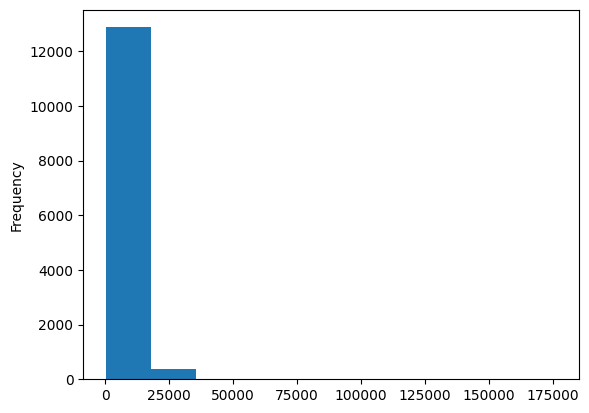

In [37]:
df['price_per_sqft'].plot(kind='hist')

<Axes: >

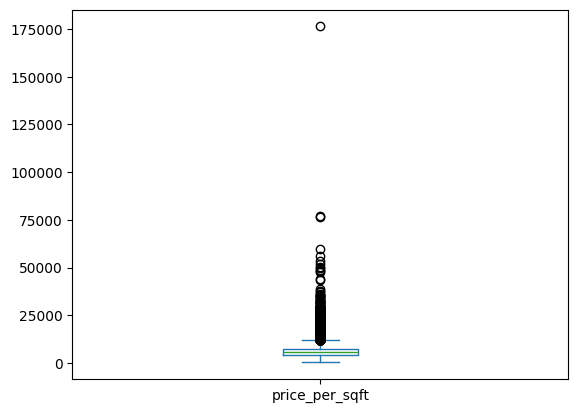

In [38]:
df['price_per_sqft'].plot(kind='box')

In [39]:
df[df['price_per_sqft']>75000]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,availability_index,society_type,total_sqft_cleaned,price_per_sqft
6421,Plot Area,18-Sep,Bommenahalli,4 Bedroom,Prood G,2940,3,2,225000000.0,Under Development,Society,2940.0,76530.61
7088,Built-up Area,Ready To Move,Srirampuram,1 BHK,NaN,650,1,3,50000000.0,Ready To Move,Society,650.0,76923.08
7657,Built-up Area,Ready To Move,Raghuvanahalli,1 BHK,NaN,425,1,1,75000000.0,Ready To Move,Society,425.0,176470.59


In [40]:
df=df[df['price_per_sqft']<=75000]

In [41]:
df['price_per_sqft'].describe()

count    13264.000000
mean      6666.320498
std       4223.029170
min        267.830000
25%       4266.435000
50%       5429.215000
75%       7305.310000
max      59770.110000
Name: price_per_sqft, dtype: float64

<Axes: ylabel='Density'>

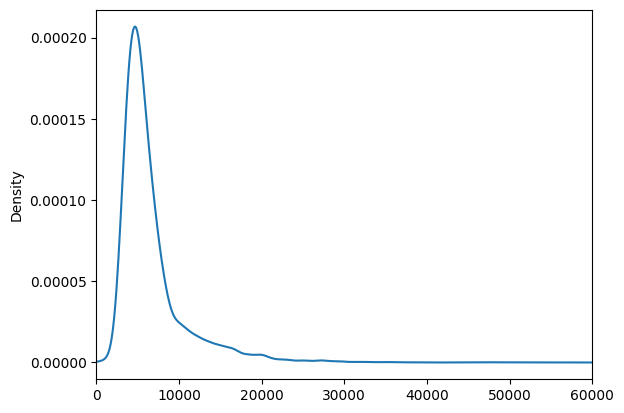

In [42]:
df['price_per_sqft'].plot(kind='kde',xlim=[0,60000])

In [43]:
np.log1p(df['price_per_sqft']).skew()

np.float64(0.7816158665193937)

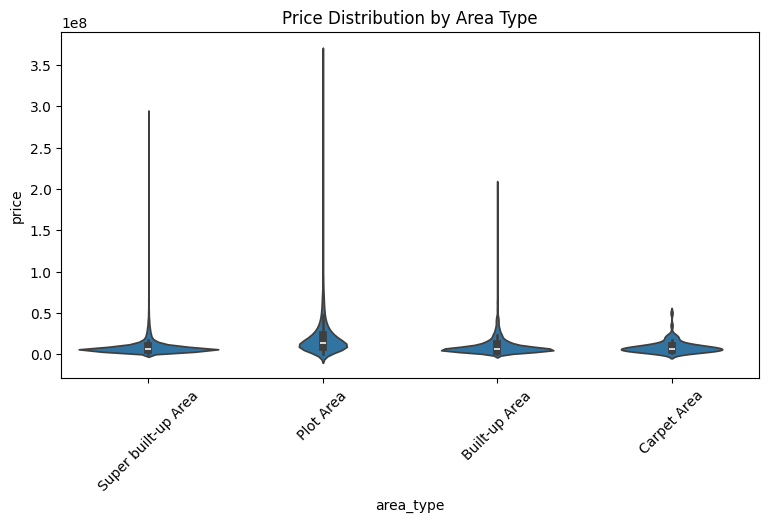

In [44]:
plt.figure(figsize=(9,4.5))
sns.violinplot(data=df, x='area_type', y='price')
plt.title('Price Distribution by Area Type')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Price per sqft vs Area_type')

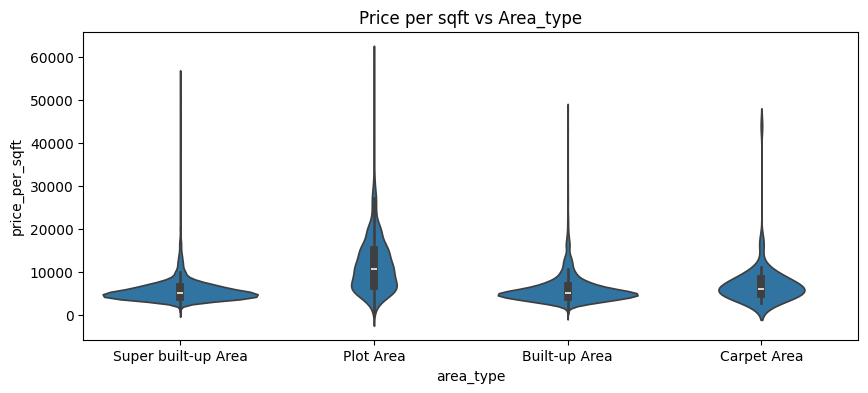

In [45]:
plt.figure(figsize=(10,4))
sns.violinplot(data=df,x='area_type',y='price_per_sqft')
plt.title('Price per sqft vs Area_type')

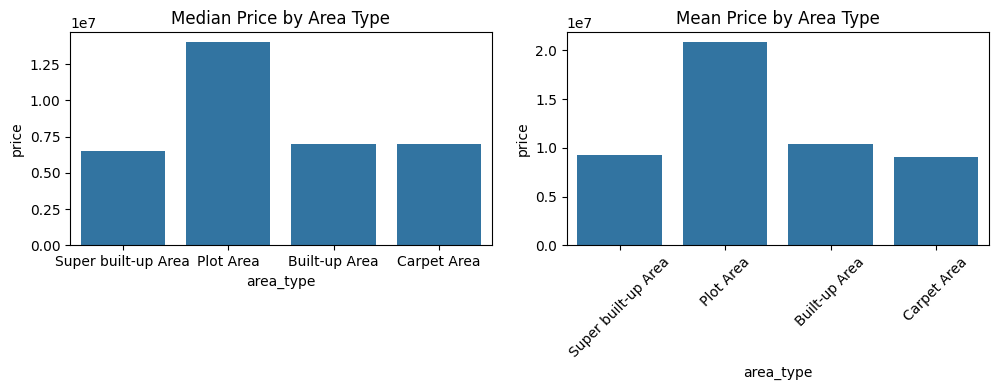

In [46]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,4))

sns.barplot(data=df, x='area_type', y='price', estimator='median', errorbar=None,ax=ax1)
ax1.set_title('Median Price by Area Type')


sns.barplot(data=df, x='area_type', y='price', estimator='mean', errorbar=None,ax=ax2)
ax2.set_title('Mean Price by Area Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

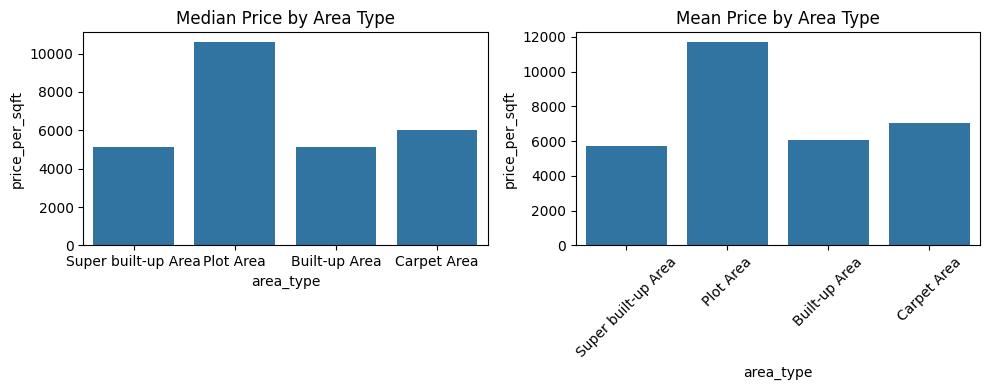

In [47]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,4))

sns.barplot(data=df, x='area_type', y='price_per_sqft', estimator='median', errorbar=None,ax=ax1)
ax1.set_title('Median Price by Area Type')


sns.barplot(data=df, x='area_type', y='price_per_sqft', estimator='mean', errorbar=None,ax=ax2)
ax2.set_title('Mean Price by Area Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

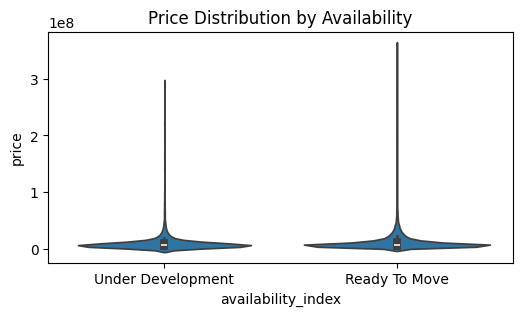

In [48]:
plt.figure(figsize=(6,3))
sns.violinplot(data=df, x='availability_index', y='price')
plt.title('Price Distribution by Availability')
plt.xticks(rotation=0)
plt.show()

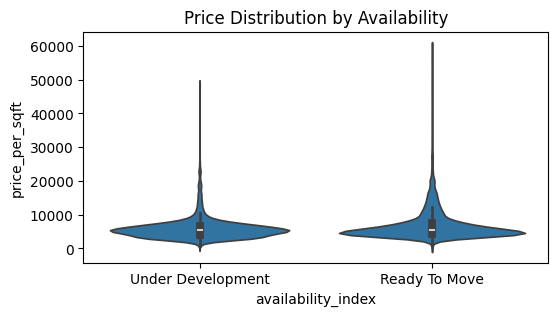

In [49]:
plt.figure(figsize=(6,3))
sns.violinplot(data=df, x='availability_index', y='price_per_sqft')
plt.title('Price Distribution by Availability')
plt.xticks(rotation=0)
plt.show()

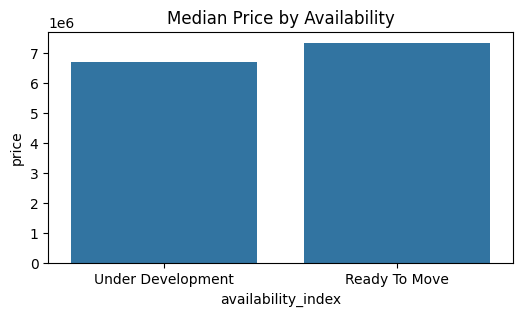

In [50]:
plt.figure(figsize=(6,3))
sns.barplot(data=df, x='availability_index', y='price', estimator='median', errorbar=None)
plt.title('Median Price by Availability')
plt.xticks(rotation=0)
plt.show()

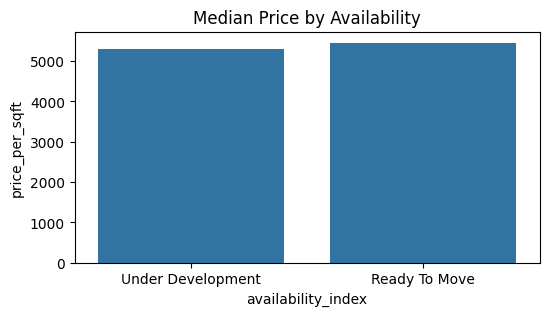

In [51]:
plt.figure(figsize=(6,3))
sns.barplot(data=df, x='availability_index', y='price_per_sqft', estimator='median', errorbar=None)
plt.title('Median Price by Availability')
plt.xticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Price distribution by no. of balconies')

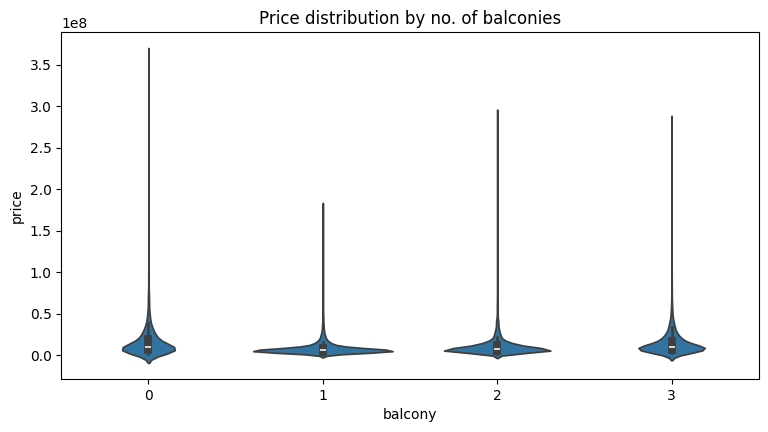

In [52]:
plt.figure(figsize=(9,4.5))
sns.violinplot(data=df,x='balcony',y='price')
plt.title('Price distribution by no. of balconies')

Text(0.5, 1.0, 'Price distribution by no. of balconies')

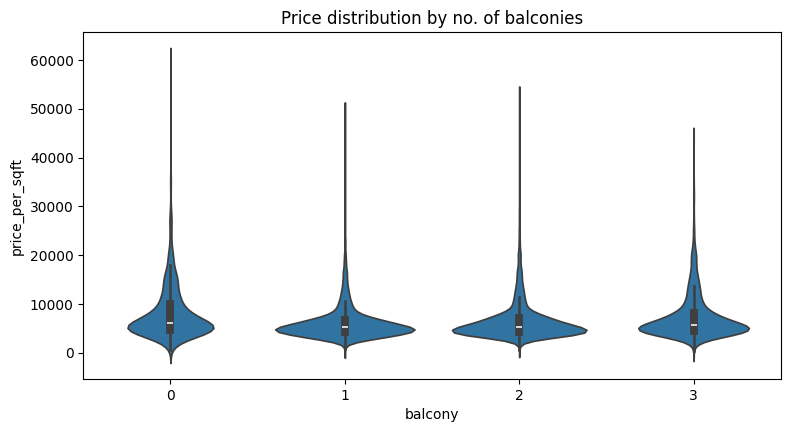

In [53]:
plt.figure(figsize=(9,4.5))
sns.violinplot(data=df,x='balcony',y='price_per_sqft')
plt.title('Price distribution by no. of balconies')

Text(0.5, 1.0, 'Median price by no.of balconies')

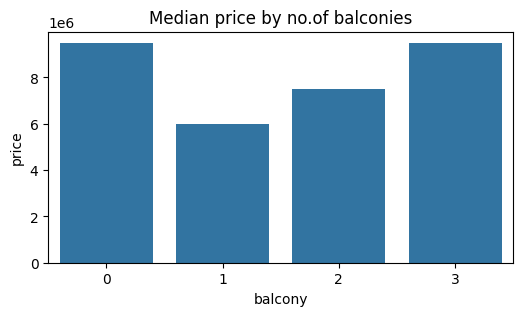

In [54]:
plt.figure(figsize=(6,3))
sns.barplot(data=df,x='balcony',y='price',estimator='median',errorbar=None)
plt.title('Median price by no.of balconies')

Text(0.5, 1.0, 'Median price by no.of balconies')

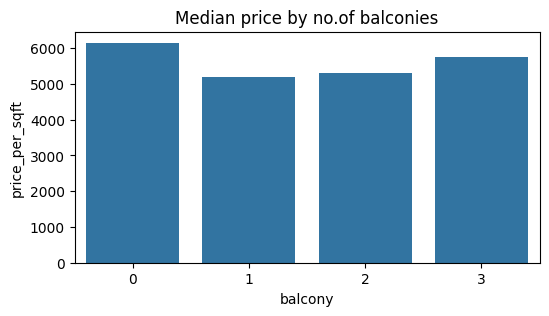

In [55]:
plt.figure(figsize=(6,3))
sns.barplot(data=df,x='balcony',y='price_per_sqft',estimator='median',errorbar=None)
plt.title('Median price by no.of balconies')

Text(0.5, 1.0, 'Price distribution by no. of baths')

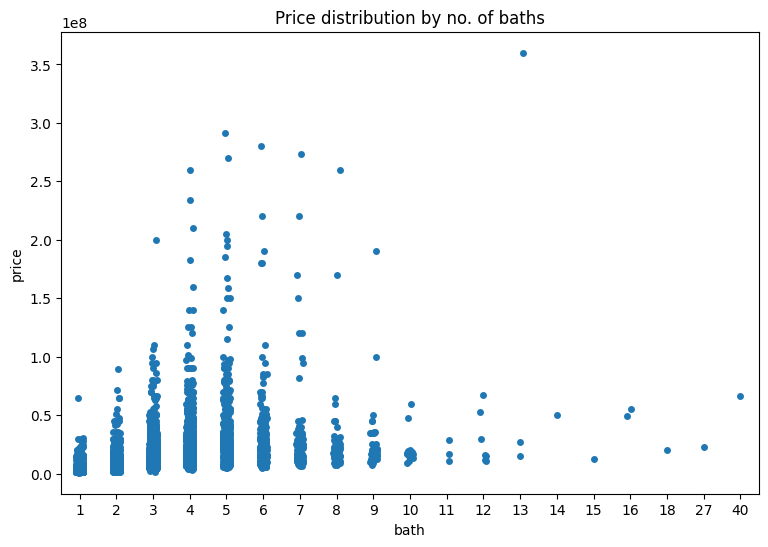

In [56]:
plt.figure(figsize=(9,6))
sns.stripplot(data=df,x='bath',y='price')
plt.title('Price distribution by no. of baths')

Text(0.5, 1.0, 'Price distribution by no. of baths')

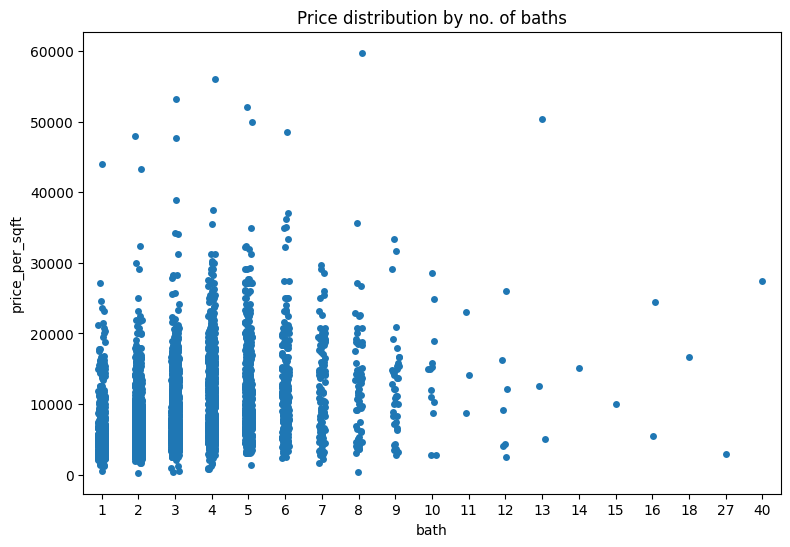

In [57]:
plt.figure(figsize=(9,6))
sns.stripplot(data=df,x='bath',y='price_per_sqft')
plt.title('Price distribution by no. of baths')

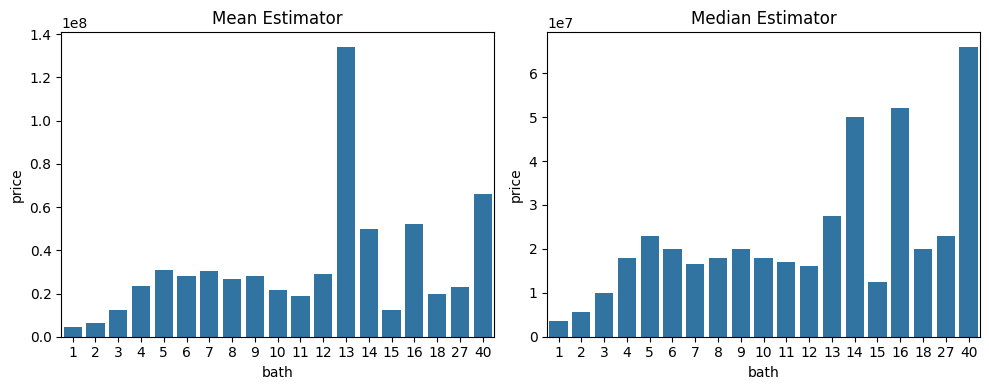

In [58]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# First subplot - Mean
sns.barplot(data=df, x='bath', y='price', ax=ax1, estimator='mean', errorbar=None)
ax1.set_title('Mean Estimator')

# Second subplot - Median
sns.barplot(data=df, x='bath', y='price', ax=ax2, estimator='median', errorbar=None)
ax2.set_title('Median Estimator')

plt.tight_layout()
plt.show()

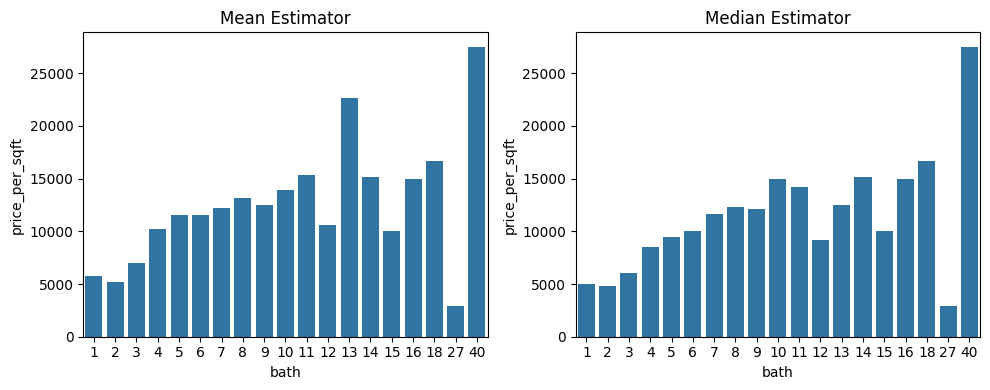

In [59]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# First subplot - Mean
sns.barplot(data=df, x='bath', y='price_per_sqft', ax=ax1, estimator='mean', errorbar=None)
ax1.set_title('Mean Estimator')

# Second subplot - Median
sns.barplot(data=df, x='bath', y='price_per_sqft', ax=ax2, estimator='median', errorbar=None)
ax2.set_title('Median Estimator')

plt.tight_layout()
plt.show()

<Axes: xlabel='total_sqft_cleaned', ylabel='price'>

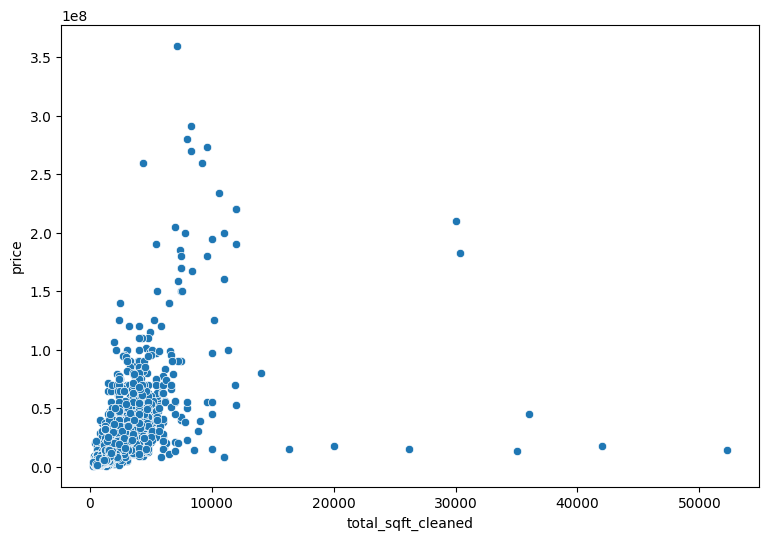

In [60]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df,x='total_sqft_cleaned',y='price')

<Axes: xlabel='total_sqft_cleaned', ylabel='price_per_sqft'>

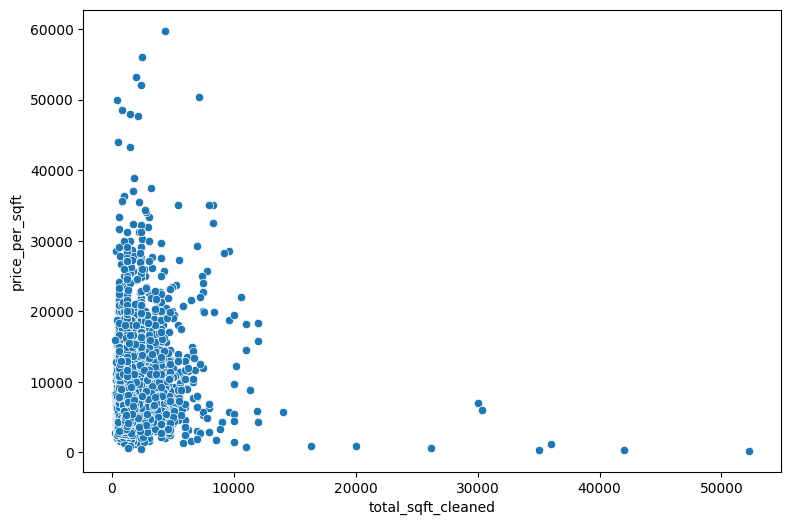

In [61]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df,x='total_sqft_cleaned',y='price_per_sqft')

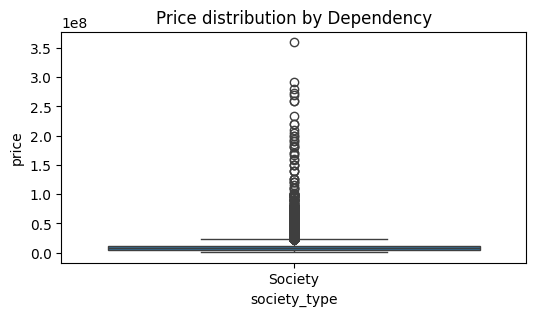

In [62]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df, x='society_type', y='price')
plt.title('Price distribution by Dependency')
plt.xticks(rotation=0)
plt.show()

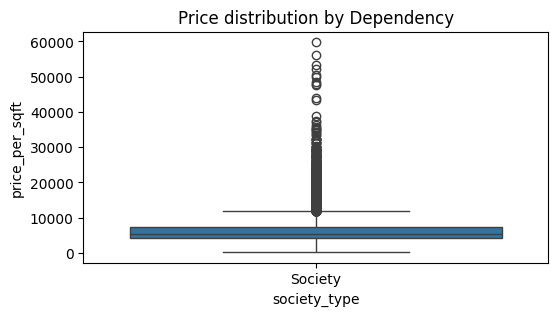

In [63]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df, x='society_type', y='price_per_sqft')
plt.title('Price distribution by Dependency')
plt.xticks(rotation=0)
plt.show()

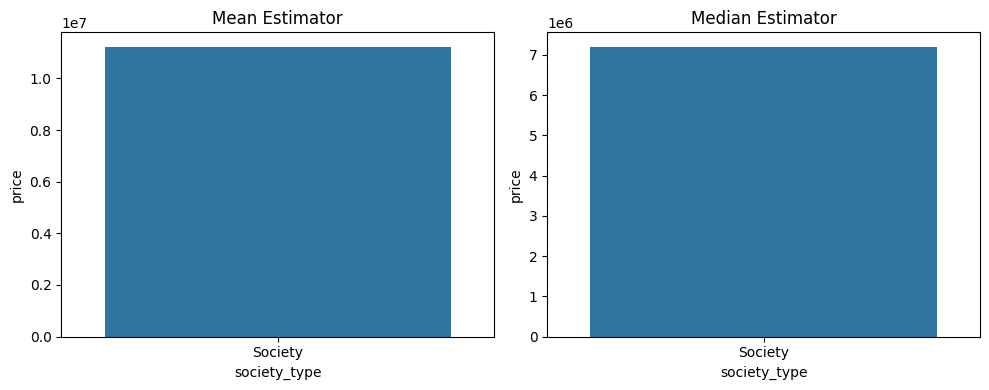

In [64]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# First subplot - Mean
sns.barplot(data=df, x='society_type', y='price', ax=ax1, estimator='mean', errorbar=None)
ax1.set_title('Mean Estimator')

# Second subplot - Median
sns.barplot(data=df, x='society_type', y='price', ax=ax2, estimator='median', errorbar=None)
ax2.set_title('Median Estimator')

plt.tight_layout()
plt.show()

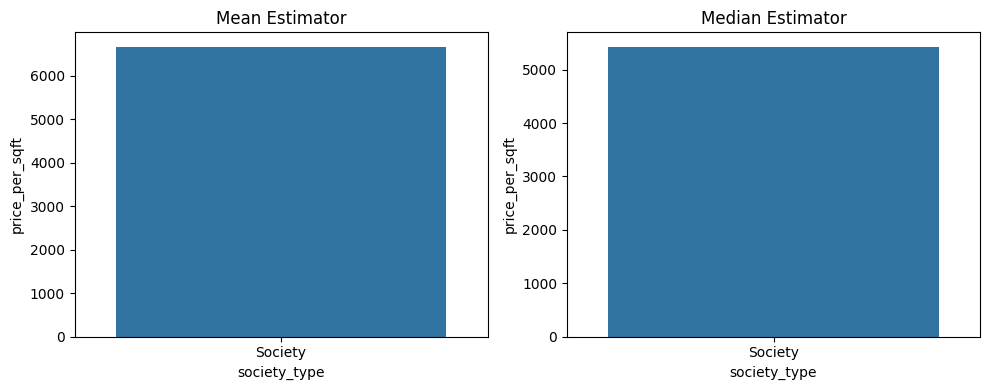

In [65]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# First subplot - Mean
sns.barplot(data=df, x='society_type', y='price_per_sqft', ax=ax1, estimator='mean', errorbar=None)
ax1.set_title('Mean Estimator')

# Second subplot - Median
sns.barplot(data=df, x='society_type', y='price_per_sqft', ax=ax2, estimator='median', errorbar=None)
ax2.set_title('Median Estimator')

plt.tight_layout()
plt.show()

In [66]:
crosstab=pd.crosstab(df['area_type'],df['availability_index'])
crosstab

availability_index,Ready To Move,Under Development
area_type,,
Built-up Area,2125,273
Carpet Area,62,23
Plot Area,1773,229
Super built-up Area,6575,2204


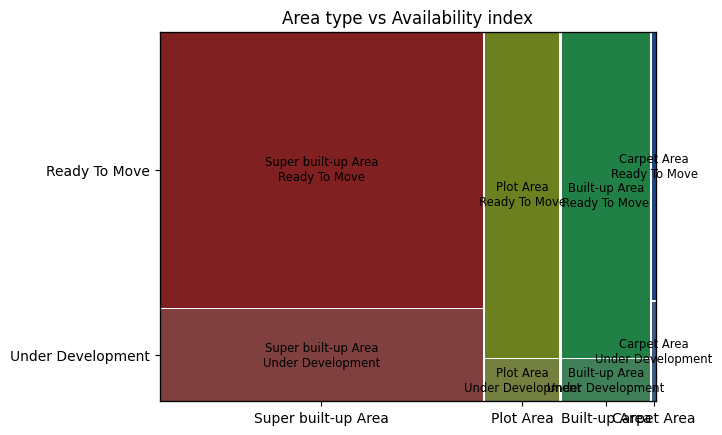

In [67]:
from statsmodels.graphics.mosaicplot import mosaic

# Mosaic plot
mosaic(df,['area_type', 'availability_index'],title='Area type vs Availability index')
plt.show()

In [68]:
society_type_crosstab_area_type=pd.crosstab(df['area_type'],df['society_type'])
society_type_crosstab_area_type

society_type,Society
area_type,
Built-up Area,2398
Carpet Area,85
Plot Area,2002
Super built-up Area,8779


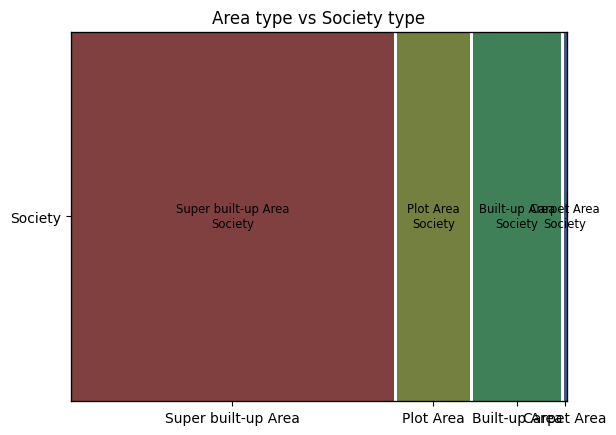

In [69]:
mosaic(df,['area_type', 'society_type'],title='Area type vs Society type')
plt.xticks(rotation=90)
plt.show()

In [70]:
society_type_crosstab_avaiability=pd.crosstab(df['society_type'],df['availability_index'])
society_type_crosstab_avaiability

availability_index,Ready To Move,Under Development
society_type,,
Society,10535,2729


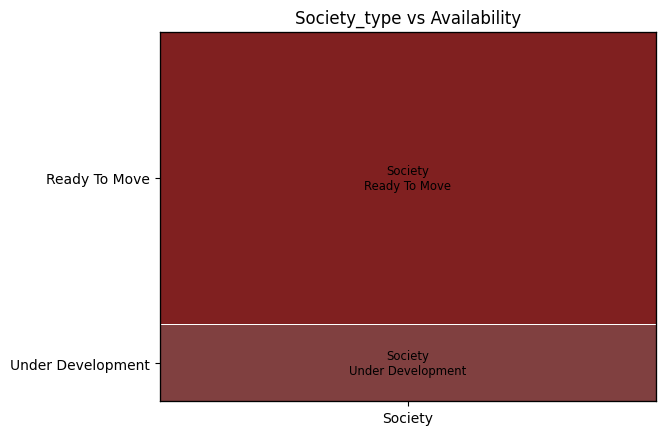

In [71]:
mosaic(df,['society_type','availability_index'],title='Society_type vs Availability')
plt.show()

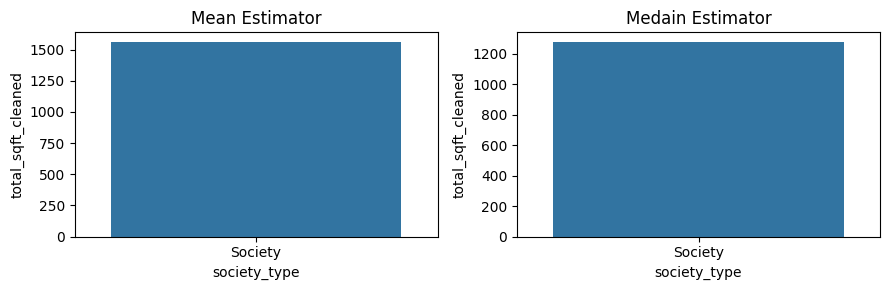

In [72]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(9,3))
sns.barplot(data=df,x='society_type',y='total_sqft_cleaned',estimator='mean',errorbar=None,ax=ax1)
ax1.set_title('Mean Estimator')
sns.barplot(data=df,x='society_type',y='total_sqft_cleaned',estimator='median',errorbar=None,ax=ax2)
ax2.set_title('Medain Estimator')
plt.tight_layout()
plt.show()

In [73]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,availability_index,society_type,total_sqft_cleaned,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2,1,3907000.0,Under Development,Society,1056.0,3699.81
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3,12000000.0,Ready To Move,Society,2600.0,4615.38
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2,3,6200000.0,Ready To Move,Society,1440.0,4305.56
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1,9500000.0,Ready To Move,Society,1521.0,6245.89
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2,1,5100000.0,Ready To Move,Society,1200.0,4250.00


## Insights:
    In Bengaluru, most of the apartment are Super-built up, followed by built-up and plot areas. These are mostly ready to move apartments. Majority of them are in one or another society but independent apartments also do exist. The apartments can range from 250 sqft of area to 50000 sqft of area with some of them having balconies . The price of the plot area is way higer than the super built-up, built-up and carpet areas. The price also is a bit more expensive if the house is in an apartment when compared to indpendent houses. Similarly, the price is a bit more expensive if the house is ready to move than those which are under development yet.  

<Axes: ylabel='Density'>

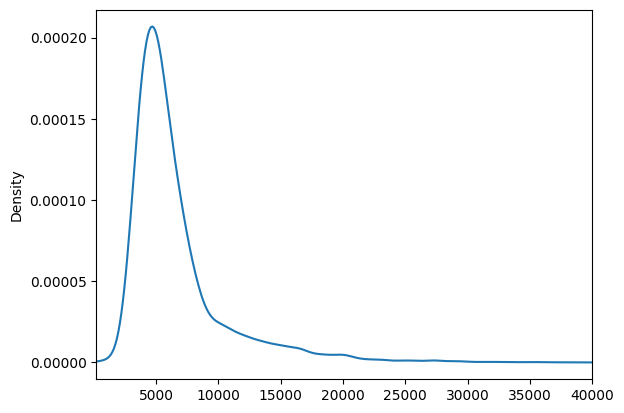

In [74]:
df['price_per_sqft'].plot(kind='kde',xlim=[200,40000])

<Axes: ylabel='Density'>

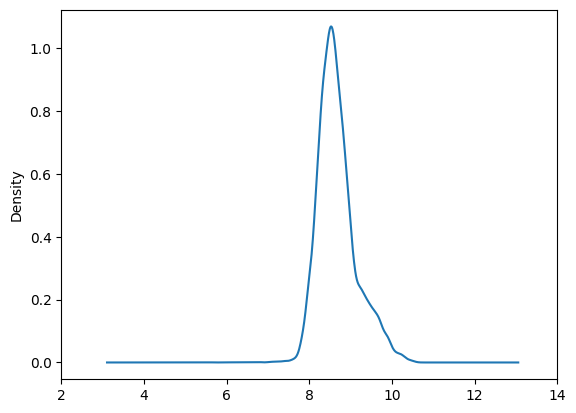

In [75]:
np.log1p(df[df['price_per_sqft']<=40000]['price_per_sqft']).plot(kind='kde',xlim=[2,14])

In [76]:
df['price_per_sqft'].skew()

np.float64(3.1827075125993662)

In [77]:
np.log1p(df[df['price_per_sqft']<=40000]['price_per_sqft']).skew()

np.float64(0.7344003800801282)